# Домашнее задание 3

Дедлайн по отправке - 02:00 22 февраля 2021 г. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 

## Задача 1 (0.5 pts)

Покажите, что сопряжённые направления являются линейно независимыми

**Решение**

Пусть сопряжённые направления являются линейно зависимыми, то есть, например, $p_0 = \sum\limits_{k=1}^I \alpha_k p_k$. Рассмотрим произведение $\left(  \sum\limits_{k=1}^I \alpha_k p_k \right)^{\top} A p_0$. 

С одной стороны $\left(  \sum\limits_{k=1}^I \alpha_k p_k \right)^{\top} A p_0 =  \sum\limits_{k=1}^I \alpha_kp_k^{\top}Ap_0$. И эта сумма равна $0$ в силу определения сопряжённых направлений, то есть, $p_k^{\top}Ap_0 = 0$, если $k \neq 0$.

С другой стороны, если вспомним, что $p_0 = \sum\limits_{k=1}^I \alpha_k p_k$, то получим $\left(  \sum\limits_{k=1}^I \alpha_k p_k \right)^{\top} A p_0 = p_0^{\top}Ap_0 > 0$. Последнее неравенство следует из того, что $A \in S^n_{++}$ и $p_0 \neq \mathbf{0}$.

## Задача 2 (5 pts)

- (2 pts) Проверьте, что направления в методе сопряжённых градиентов для квадратичной целевой функции и в методе Флетчера-Ривса являются направлениями убывания. Для любой ли стратегии линейного поиска шага в методе Флетчера-Ривса полученное направление будет направлением убывания? Почему?

- (3 pts) Даёт ли процедура дробления шага шаг, удовлестворяющий условию Вольфа? Если нет, то почему и как её нужно модифицировать, чтобы найти шаг, удовлетворяющий условию Вольфа? Покажите экспериментально, что предложенная Вами процедура работает.

In [ ]:
# Место для Вашего решения

## Задача 3 (4 pts)

Исследуйте зависимость числа итераций необходимого для сходимости линейного метода сопряжённых градиентов от распределения собственных значений матрицы $A$. 
Рассмотрите следующие сценарии:

- собственные значения распределены равномерно на некотором отрезке
- собственные числа распределены блоками около некоторых заданных чисел в окрестности радиуса $\varepsilon$, например каждые 5 собственных значений находятся в окрестности радиуса $0.5$ около чисел кратных 5. Придумайте свою стратегию генерации матриц по заданному сценарию

Постройте соответствующий график для каждого сценария. Если сценарий зависит от параметра, то на одном графике изобразите зависимость для нескольких наиболее характерных параметров, добавьте легенду и сделайте вывод об устойчивости оценки сходимости метода сопряжённых градиентов относительно распределение спектра матрицы.

**Решение**

Пусть у матрицы A1 собственные значения распределены равномерно на отрезке, а у А2 распределены блоками около некоторых заданных чисел. Пусть у этих матриц собственные значения будут распределены на одном и том же отрезке $[0.1; 1100]$. При этом делаем их числа обусловленности примерно равными, чтобы знаменатель прогрессии в теоретической оценке сходимости был один и тот же.

In [153]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

eig_1 = np.append(1000*np.random.random(n-1)+0.1, 0.1)
#eig_1 = 1e-5*np.random.random(n)+100
A1 = np.diagflat(eig_1)
print("Min eigenvalue of A1: ", eig_1.min())
print("Max eigenvalue of A1: ", eig_1.max())
print("Condition number: ", eig_1.max()/eig_1.min())

U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A1 = Q.dot(A1).dot(Q.T)
A1 = (A1 + A1.T) * 0.5
#print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)

f1 = lambda x: 0.5 * x.dot(A1.dot(x)) - b.dot(x)
grad_f1 = lambda x: A1.dot(x) - b
x0 = np.zeros(n)

Min eigenvalue of A1:  0.1
Max eigenvalue of A1:  999.9938709052087
Condition number:  9999.938709052087


In [154]:
def ConjugateGradientQuadratic(x0, A, b, grad_list, tol=1e-12, callback=None):
    x = x0
    r = A.dot(x0) - b
    p = -r
    n = 0
    #grad_list = []
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
        grad_list.append(np.linalg.norm(r))
        #print(grad_list[n])
        n += 1
    return (x, n)

Сначала решим задачу для матрицы А1.

Iterations number:  291


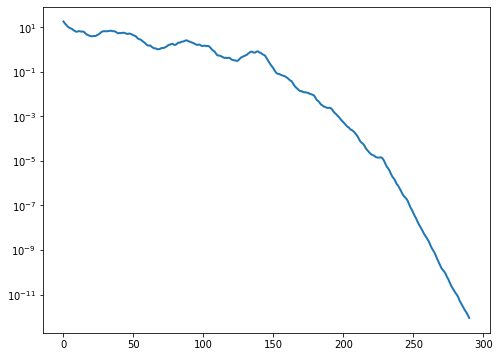

In [155]:
grads = []
x, n = ConjugateGradientQuadratic(x0, A1, b, grads)
print("Iterations number: ", n)

plt.figure(figsize=(8,6))
plt.semilogy(grads, linewidth=2)

Для матрицы А2 рассмотрим различные значения $\varepsilon$ и проследим, как меняется число итераций в зависимости от него. Попробуем значения $\varepsilon = 0.05; 0.5; 5$

Min eigenvalue of A2:  0.1
Max eigenvalue of A2:  1000.0492739058838
Condition number:  10000.492739058836
Iterations number:  52


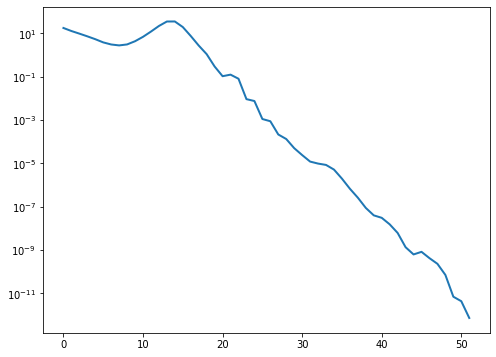

In [156]:
n = 1000
eps = 0.05
d = 50

eig_2 = np.array([])
for i in range(n//d):
    eig_2 = np.append(eig_2, 2*eps*np.random.random(d) + (i+1)*d - eps)
eig_2[0] = 0.1
A2 = np.diagflat(eig_2)
print("Min eigenvalue of A2: ", eig_2.min())
print("Max eigenvalue of A2: ", eig_2.max())
print("Condition number: ", eig_2.max()/eig_2.min())

U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A2 = Q.dot(A2).dot(Q.T)
A2 = (A2 + A2.T) * 0.5
#print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)

f2 = lambda x: 0.5 * x.dot(A2.dot(x)) - b.dot(x)
grad_f2 = lambda x: A2.dot(x) - b
x0 = np.zeros(n)

grads = []
x, n = ConjugateGradientQuadratic(x0, A2, b, grads)
print("Iterations number: ", n)

plt.figure(figsize=(8,6))
plt.semilogy(grads, label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)

Min eigenvalue of A2:  0.1
Max eigenvalue of A2:  1000.4995837074573
Condition number:  10004.995837074572
Iterations number:  64


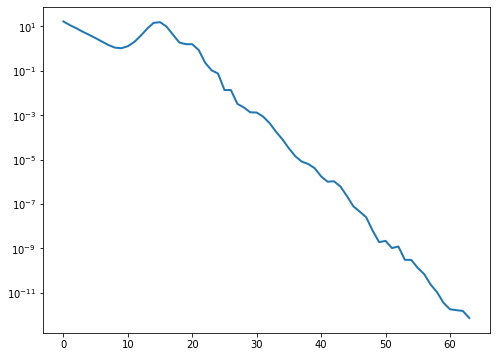

In [157]:
n = 1000
eps = 0.5
d = 50

eig_2 = np.array([])
for i in range(n//d):
    eig_2 = np.append(eig_2, 2*eps*np.random.random(d) + (i+1)*d - eps)
eig_2[0] = 0.1
A2 = np.diagflat(eig_2)
print("Min eigenvalue of A2: ", eig_2.min())
print("Max eigenvalue of A2: ", eig_2.max())
print("Condition number: ", eig_2.max()/eig_2.min())

U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A2 = Q.dot(A2).dot(Q.T)
A2 = (A2 + A2.T) * 0.5
#print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)

f2 = lambda x: 0.5 * x.dot(A2.dot(x)) - b.dot(x)
grad_f2 = lambda x: A2.dot(x) - b
x0 = np.zeros(n)

grads = []
x, n = ConjugateGradientQuadratic(x0, A2, b, grads)
print("Iterations number: ", n)

plt.figure(figsize=(8,6))
plt.semilogy(grads, label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)

Min eigenvalue of A2:  0.1
Max eigenvalue of A2:  1004.9794654680508
Condition number:  10049.794654680507
Iterations number:  81


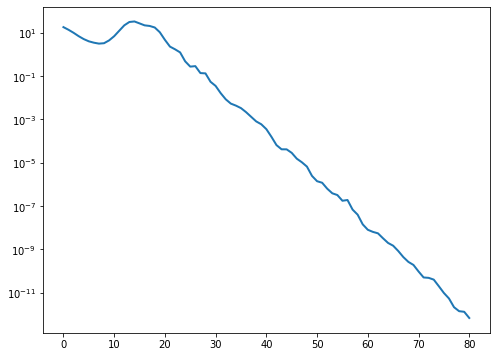

In [158]:
n = 1000
eps = 5
d = 50

eig_2 = np.array([])
for i in range(n//d):
    eig_2 = np.append(eig_2, 2*eps*np.random.random(d) + (i+1)*d - eps)
eig_2[0] = 0.1
A2 = np.diagflat(eig_2)
print("Min eigenvalue of A2: ", eig_2.min())
print("Max eigenvalue of A2: ", eig_2.max())
print("Condition number: ", eig_2.max()/eig_2.min())

U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A2 = Q.dot(A2).dot(Q.T)
A2 = (A2 + A2.T) * 0.5
#print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)

f2 = lambda x: 0.5 * x.dot(A2.dot(x)) - b.dot(x)
grad_f2 = lambda x: A2.dot(x) - b
x0 = np.zeros(n)

grads = []
x, n = ConjugateGradientQuadratic(x0, A2, b, grads)
print("Iterations number: ", n)

plt.figure(figsize=(8,6))
plt.semilogy(grads, label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)

А теперь попробуем поменять расстояние $d$ между блоками. Рассмотрим $d = 5, 25, 100$.

Min eigenvalue of A2:  0.1
Max eigenvalue of A2:  1000.3011233461016
Condition number:  10003.011233461015
Iterations number:  201


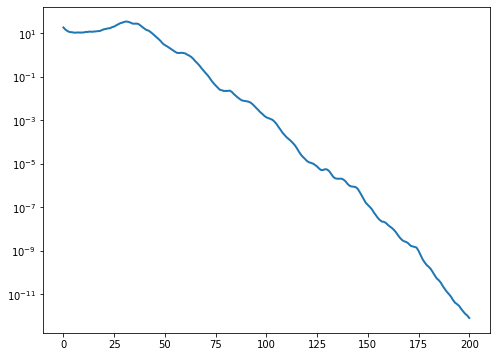

In [159]:
n = 1000
eps = 0.5
d = 5

eig_2 = np.array([])
for i in range(n//d):
    eig_2 = np.append(eig_2, 2*eps*np.random.random(d) + (i+1)*d - eps)
eig_2[0] = 0.1
A2 = np.diagflat(eig_2)
print("Min eigenvalue of A2: ", eig_2.min())
print("Max eigenvalue of A2: ", eig_2.max())
print("Condition number: ", eig_2.max()/eig_2.min())

U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A2 = Q.dot(A2).dot(Q.T)
A2 = (A2 + A2.T) * 0.5
#print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)

f2 = lambda x: 0.5 * x.dot(A2.dot(x)) - b.dot(x)
grad_f2 = lambda x: A2.dot(x) - b
x0 = np.zeros(n)

grads = []
x, n = ConjugateGradientQuadratic(x0, A2, b, grads)
print("Iterations number: ", n)

plt.figure(figsize=(8,6))
plt.semilogy(grads, label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)

Min eigenvalue of A2:  0.1
Max eigenvalue of A2:  1000.3998020358531
Condition number:  10003.998020358531
Iterations number:  96


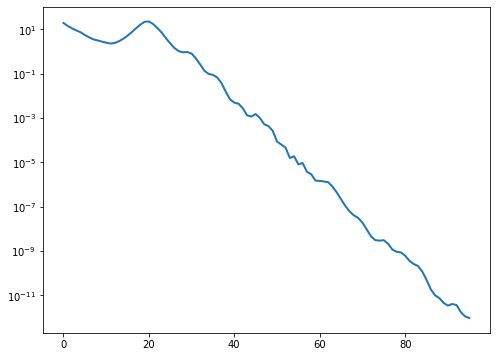

In [160]:
n = 1000
eps = 0.5
d = 25

eig_2 = np.array([])
for i in range(n//d):
    eig_2 = np.append(eig_2, 2*eps*np.random.random(d) + (i+1)*d - eps)
eig_2[0] = 0.1
A2 = np.diagflat(eig_2)
print("Min eigenvalue of A2: ", eig_2.min())
print("Max eigenvalue of A2: ", eig_2.max())
print("Condition number: ", eig_2.max()/eig_2.min())

U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A2 = Q.dot(A2).dot(Q.T)
A2 = (A2 + A2.T) * 0.5
#print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)

f2 = lambda x: 0.5 * x.dot(A2.dot(x)) - b.dot(x)
grad_f2 = lambda x: A2.dot(x) - b
x0 = np.zeros(n)

grads = []
x, n = ConjugateGradientQuadratic(x0, A2, b, grads)
print("Iterations number: ", n)

plt.figure(figsize=(8,6))
plt.semilogy(grads, label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)

Min eigenvalue of A2:  0.1
Max eigenvalue of A2:  1000.4951763655539
Condition number:  10004.95176365554
Iterations number:  40


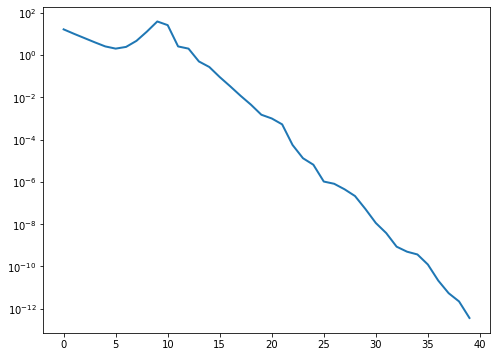

In [161]:
n = 1000
eps = 0.5
d = 100

eig_2 = np.array([])
for i in range(n//d):
    eig_2 = np.append(eig_2, 2*eps*np.random.random(d) + (i+1)*d - eps)
eig_2[0] = 0.1
A2 = np.diagflat(eig_2)
print("Min eigenvalue of A2: ", eig_2.min())
print("Max eigenvalue of A2: ", eig_2.max())
print("Condition number: ", eig_2.max()/eig_2.min())

U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A2 = Q.dot(A2).dot(Q.T)
A2 = (A2 + A2.T) * 0.5
#print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)

f2 = lambda x: 0.5 * x.dot(A2.dot(x)) - b.dot(x)
grad_f2 = lambda x: A2.dot(x) - b
x0 = np.zeros(n)

grads = []
x, n = ConjugateGradientQuadratic(x0, A2, b, grads)
print("Iterations number: ", n)

plt.figure(figsize=(8,6))
plt.semilogy(grads, label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)

Как видно, чем меньше $\varepsilon$ и чем  больше $d$, тем быстрее сходится. Также, для всех вариантов матрицы А2 сходимость была всё равно быстрее, чем для А1. Можем сделать вывод, что чем более равномерно на отрезке распределены собственные значения матрицы, тем медленнее сходимость.